Assignment 1 - Xiang Zhang - 0932901

This assignment is accomplished in collaboration with Chuchen Cai(1321625) Yawei Liu(1368591).

In [1]:
import sys
import pdb
# sys.path.insert allows us to define paths from where we can import .py files
sys.path.insert(0, 'C://Users//Xiang//Desktop//jupyter notebooks//assets')

import mnist
import numpy as np
from collections import Counter

## Data loading
First we will load the data from the Mnist data set using the provided *mnist.py* script. To make it a bit easier, we will only use the digits 1, 4, and 6.

In [2]:
#mnist.init() # you only have to run this once, downloads and pickles the data set
x_train, y_train, x_test, y_test = mnist.load()
# only obtain 1, 4, and 6 samples
# for all the labels in the training set, check if the label belongs to the set [1, 4, 6]. 
# list comprehensions automatically constructs a new list from the original
print('Mean value of training data: {:.3f}, Standard deviation of training data: {:.3f}'
      .format(x_train.mean(), x_train.std()))
idx146_train = [label in [1, 4, 6] for label in y_train] 
y_train = y_train[idx146_train]
x_train = x_train[idx146_train]

print(Counter(y_train))

# Same for the test set
idx146_test = [label in [1,4,6] for label in y_test]
y_test = y_test[idx146_test]
x_test = x_test[idx146_test]


Mean value of training data: 33.318, Standard deviation of training data: 78.567
Counter({1: 6742, 6: 5918, 4: 5842})


In [3]:
print('Shape of training data: {}, Shape of training labels: {}'.format(x_train.shape, y_train.shape))
print('Mean value of training data: {:.3f}, Standard deviation of training data: {:.3f}'
      .format(x_train.mean(), x_train.std()))
print('Shape of test data: {}, Shape of test labels: {}'.format(x_test.shape, y_test.shape))

Shape of training data: (18502, 784), Shape of training labels: (18502,)
Mean value of training data: 28.033, Standard deviation of training data: 73.068
Shape of test data: (3075, 784), Shape of test labels: (3075,)


If we look at the shape of the training data, we can see that the data is stored in vectorized form (The 28x28 pixel images are reshaped to a 1x784 array before storing). From the original 60.000 samples, we only took the 1, 4, and 6 digits so we expect approximately 18.000 samples. The resulting shapes of the training data and training labels is what we expect. Performing sanity checks such as this is generally a good idea, it reduces the amount spent debugging when an inevitable bug shows up.

### Q1: Think of two other sanity checks you could perform (what expectations do we have about our data). Data can be ordinary images but also auxilary information such as for example the age of a patient with accompanying CT scan.

<span style="color:red">''' Write down the answer in the cell markdown here (doubleclick the text)  '''</span>.
<ol>
<li>The mean value of training data for the original 60.000 samples is 33.318, and I expect the mean vale of the training data for the 18502 samples is also close to 33.318. The result shows that the mean value of the downsampled training data is 28.033, which is not far from what we expected.</li>
<br/>
<li>We only took 1, 4, 6 digits, so we expect there will only be these 3 types of lables in the training lables. I use counter function to count the occurance of the labels in our new training set. The result shows that there are only 1, 4, 6 digits in our training lable, which is what I expect.</li>
</ol>

## Standardizing data
Data standardization is an important pre-processing step for nearly all machine learning algorithms. We want to make sure all data is on the same scale.
For example, results may vary drastically if some of the images have values in the range of [0, 1] (double) while others have values in the range of [0, 255] (uint8).

The sklearn library has a variety of tools to make data pre-processing a lot easier, one of which is the StandardScaler class.

In [4]:
from sklearn.preprocessing import StandardScaler

# Create instance of the StandardScaler class
sc = StandardScaler()
# Fit the scaling parameters and transform the training data based on the training set
x_train_scaled = sc.fit_transform(x_train.astype(float))
# transform the test data based on train scaling parameters
x_test_scaled = sc.transform(x_test.astype(float))
print('Mean value of train data: {:.3f}, Standard deviation of train data: {:.3f}'
      .format(x_train.mean(), x_train.std()))
print('Mean value of test data: {:.3f}, Standard deviation of test data: {:.3f}'
      .format(x_test.mean(), x_test.std()))
print('Mean value of train data after scaling: {:.3f}, Standard deviation of train data after scaling: {:.3f}'
      .format(x_train_scaled.mean(), x_train_scaled.std()))

Mean value of train data: 28.033, Standard deviation of train data: 73.068
Mean value of test data: 28.618, Standard deviation of test data: 73.881
Mean value of train data after scaling: 0.000, Standard deviation of train data after scaling: 0.922


As we can see, the values of the training data is transformed to have mean 0 and a std of approximately 1. With the StandardScaler class, the mean and standard deviation are calculated with the training data. Afterwards, the test set is scaled with the same mean and standard deviation. A common mistake is to calculate seperate means and standard deviations for the train and test set. Lets consider the following example:

The standard score of a sample x is calculated as:

z = (x - $\mu$) / $\sigma$

where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the training samples

Let's assume we have a simple training set consisting of 3 samples with 1 feature (let's call this feature "length"):

* train_1: 10 cm -> class_2
* train_2: 20 cm -> class_2
* train_3: 30 cm -> class_1

mean: 20, std.: 8.2

After standardization, the transformed feature values are

* train_std_1: -1.21 -> class_2
* train_std_2: 0 -> class_2
* train_std_3: 1.21 -> class_1

Next, let's assume our model has learned to classify samples with a standardized length value < 0.6 as class_2 (class_1 otherwise). So far so good. Now, let's say we have 3 unlabeled data points that we want to classify:

* new_4: 5 cm -> class ?
* new_5: 6 cm -> class ?
* new_6: 7 cm -> class ?

### Q2: Calculate the standardized "length" values of the new samples using the training set parameters as well as with the new test set parameters. How does this affect the resulting predictions on the new samples.

<span style="color:red">''' Write down the answer here, you are also allowed to change the cell to a code cell if you prefer. Be sure to accompany your code with comments for clarity''' </span>.

Using the training set parameters:
* new_4: -1.83 -> class_2
* new_5: -1.71 -> class_2
* new_6: -1.59 -> class_2

Using the test set parameters:
* new_4: -1.22 -> class_2
* new_5: 0 -> class_2
* new_6: 1.22 -> class_1

It can be observed that the results of standarlization of the new samples are quite different, which are caused by using different set parameters to standarlize the samples. The test set should be standarlized by means of the same training set parameters instead of using the test set parameters. This is because we would like that the test set is correlated with the training data, otherwise using test set to calucale the accurancy of KNN would be pointless.

## K-nearest neighbors
Finding clusters in data is an important topic in image analysis, machine learning and pattern recognition. Points in a cluster are similar and share certain properties. Hence, knowing the boundaries of these clusters is very useful for making a prediction about the properties of a new – unseen –  data point. An example from image processing is finding the distinction between background and foreground in a video frame. Using region properties of annotated images you can find clusters for both, which you can use to predict the back- and foreground in a new frame. Another, widely studied, example is the clustering/classification of handwritten digits. In this exercise you will implement the **K-nearest neigbors** algorithm to cluster handwritten digits. This will illustrate the power of these algorithms to find clusters in data. The use of handwritten digits allows us to visually check the clustering result of high-dimensional data in a meaningful way. Furthermore, you will see that by using **Principal Component Analysis (PCA)**, you can reduce the dimensionality significantly, while still retaining enough information to find relevant clusters.

### Q3.	Cluster the data with your own implementation of the K-nearest neighbors clustering algorithm. Do this using K=1. Calculate the accuracy of your algorithm.

Note: the algorithm could take quite a while since you would have to compare every test sample to every training sample depending on your cpu. Check to see if the algorithm works on a few samples before you use the entire set. For reference, on my laptop it took approximately 5 minutes.

In [5]:
# write knn code here
from pylab import *

label_train=y_train
label_test=y_test
train=x_train_scaled
test=x_test_scaled

def knn_all(train,label_train,test):    
    res = []
    for j in range(len(test)):
        all_dis = [] 
        for i in range(len(train)):
            dis = np.linalg.norm(train[i]-test[j])
            all_dis.append(dis)
        sorted_dis = np.argsort(all_dis)
        res.append(label_train[sorted_dis[1]])
    return res


def calc_precision(res,label_test,test):
    pre=[]
    precision=0
    for i in range(len(test)):
        if res[i]==label_test[i]:
            precision+=1
    pre.append(precision/len(test))
    return pre


res=knn_all(train,label_train,test)

print("precision:"+str(calc_precision(res,label_test,test)))

precision:[0.9840650406504065]


Great! The accuracy on the test set is already very high (should be 96%+). However, this problem is not very complex and the image size is relatively small (28x28). In complex real-world problems, the performance of this algorithm will plummet. 

### Q4. Give two reasons why knn on direct pixel values not a good choice for most real-world problems. Hint 1: Try running your 1-nn algorithm with more digits. What do you observe? Hint 2: Curse of dimensionality.

<span style="color:red">''' Answer to Q3 goes here '''</span>.

* I try to implement my 1-nn algorithm with more digits, and I find that the computation time lasts even longer than before but gives less accurate result. In real-world problems, the data set is even larger, which would consume extremly long time to compute.


* At the beginning, the accurancy of classification will increase as the dimension goes up. However, the accurancy will not increase anymore when a value of dimension reaches. On the contrary, the accurancy will even decrease as the dimension grows even larger. In real-world problems, it is very likely that the data set has multiple dimebsions. Therefore, the curse of dimensionality would be a pain in real-world problem.

## Principle Component Analysis
In order to overcome the unscalability of training classifyers on pixel values directly, dimensionality reduction is neccesary. Principle component analysis (PCA) is an unsupervised dimensionality reduction technique which we will implement in this assignment. The original feature vector (784 dimensions) will be reduced to *k* dimensions.

PCA is implemented in the following steps:

* Construct the covariance matrix.
* Decompose the covariance matrix into its eigenvectors and eigenvalues.
* Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
* Select the *k* eigenvectors which correspond to the *k* largest eigenvalues, where *k* is the dimensionality of the new feature subspace.
* Construct a projection matrix **W** from the "top" *k* eigenvectors.
* Transform the d-dimensional input data set using **W** to obtain a new k-dimensional feature subspace

### Q5a. calculate the eigendecomposition of the covariance matrix. Hint: use np.cov() and np.linalg.eigh()

In [6]:
# Calculate eigenvalues and eigenvectors here
cov=np.cov(x_train_scaled.T)
eig_val, eig_vec = np.linalg.eig(cov)

### Q5b. Calculate the cumulative and explained variance. Remember: the eigenvalues have to be sorted in decreasing order.

In [7]:
# calculate total and explained variance here. If you name the variables cum_var_exp and var_exp the plotting function
# in the next cell will work nicely

eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(key=lambda tup: tup[0], reverse=True)

tot = sum(eig_val)
var_exp = [(i / tot)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


C:\Users\Xiang\Anaconda3\lib\site-packages\matplotlib\transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\Xiang\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


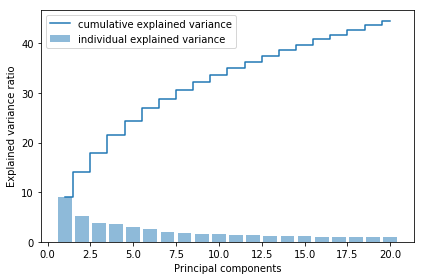

In [8]:
import matplotlib.pyplot as plt
# This function will plit the first num_features in order of importance. 

num_features = 20

plt.bar(range(1, num_features+1), var_exp[:num_features], alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, num_features+1), cum_var_exp[:num_features], where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

### Q5c. Construct **W** with *k=2* (the first two features with most explained variance). Hint: **W** should have shape (784,2)

In [9]:
# Construct W here, the next cell will plot the clusters for you based on the first two principle components

W = np.hstack((eig_pairs[0][1].reshape(784,1), 
                      eig_pairs[1][1].reshape(784,1)))

print('Matrix W:\n', W)

Matrix W:
 [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


The following cell calculates the new training features and plots them to show the clustered samples. If PCA was implemented correctly you can clearly see a clustering in the new feature space. The clustering is not perfect but we reduced the dimensionality of our feature space drastically

C:\Users\Xiang\Anaconda3\lib\site-packages\numpy\core\numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


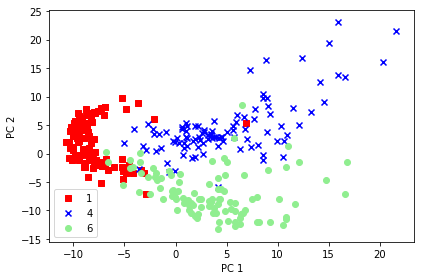

In [10]:
from matplotlib.colors import ListedColormap

x_train_pca = x_train_scaled.dot(W)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
labels = (1, 4, 6)
cmap = ListedColormap(colors[:len(np.unique(y_train))])


for label, c, m in zip(labels, colors, markers):
    plt.scatter(x_train_pca[y_train == label, 0][:100], 
                x_train_pca[y_train == label, 1][:100], 
                c=c, label=label, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

## PCA in sklearn
While implementing your own algorithms is good excercise, most commonly used algorithms have already been efficiently implemented. Both PCA and KNN have been implemented in the sklearn library. Look through the code below make sure you understands how the sklearn functions are used.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25) # instantiate an instance of the PCA class with 25 components
x_train_pca = pca.fit_transform(x_train_scaled) # the fit_transform function operates the same way as in the StandardScaler class
x_test_pca = pca.transform(x_test_scaled)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)
test_prediction = knn.predict(x_test_pca)



accuracy = np.sum(test_prediction == y_test)/len(y_test)
print('Mnist test accuracy: {:.3f}%.'.format(accuracy*100))


Mnist test accuracy: 98.992%.


More than 99%! Not bad at all. Below we plot the decision region based on the first two principle components.

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02, plot_boundary=False):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface (not possible for KNN for more than 2 training dimensions)
    
    if plot_boundary:
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0][:100], 
                    y=X[y == cl, 1][:100],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


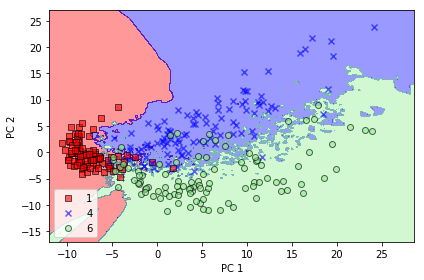

In [14]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)

plot_decision_regions(x_test_pca, y_test, classifier=knn, plot_boundary=True)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()